In [1]:
# import library
import sklearn
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [10]:
# This is the example array that I used:
y_true = [1,1,1,1,0,1,0,1,1,0]
y_pred = [1,1,1,1,1,1,0,1,1,1]

In [11]:
# For example: if you have y_true is [1,1,1,1,0,0,0,0,1,0] and y_pred is 
# [1,1,1,1,1,1,1,1,1,1], and if you want to get an overal results:
# ! You have to make sure that the first parameter is y_true (real value) and the second parameter is y_pred(predicted value)

# e.g. balanced accuracy 
balanced_accuracy_results = balanced_accuracy_score(y_true, y_pred)

# e.g. mcc
mcc_results = mcc(y_true, y_pred)

# e.g. f1 score, you can check this website when determine if you need average: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_results = f1_score(y_true, y_pred, average='micro')

In [12]:
print('balanced_accuracy_result is: ' + str(balanced_accuracy_results))
print('mcc result is: ' + str(mcc_results))
print('f1 score is: ' + str(f1_results))

balanced_accuracy_result is: 0.6666666666666666
mcc result is: 0.5091750772173156
f1 score is: 0.8000000000000002


Text(0,0.5,'balanced accuracy score')

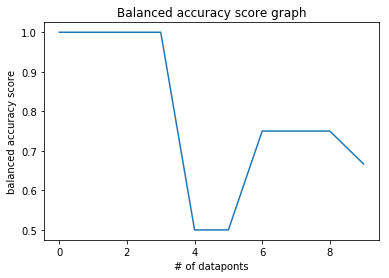

In [13]:
# If you want to plot a graph to see how the metric goes when you increase the datapoints:

# I will just use the balanced accuracy as the example, and you can replace the metric for the rest
b_acc_array = []
for i in range(len(y_true)):
    b_acc_array.append(balanced_accuracy_score(y_true[0:i+1], y_pred[0:i+1]))
plt.plot(b_acc_array)
plt.title('Balanced accuracy score graph')
plt.xlabel('# of dataponts')
plt.ylabel('balanced accuracy score')

# Tests with using the Morgan Fingerprint as input feature

In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors

In [3]:
descr = Descriptors._descList
calc = [x[1] for x in descr]

def describe_mol(mol):
	fp = AllChem.GetMorganFingerprintAsBitVect(mol,4,nBits=2048)
	fp_list = []
	fp_list.extend(fp.ToBitString())
	fp_expl = []
	fp_expl = [float(x) for x in fp_list]
	ds_n = []
	for d in calc:
		v = d(mol)
		if v > np.finfo(np.float32).max: 	# postprocess descriptors for freak large values
			ds_n.append(np.finfo(np.float32).max)
		elif math.isnan(v):
			ds_n.append(np.float32(0.0))
		else:
			ds_n.append(np.float32(v))
    
	return fp_expl + list(ds_n)


In [ ]:
e_x = [describe_mol(Chem.MolFromSmiles(e)) for e in e_smiles]
d_x = [describe_mol(Chem.MolFromSmiles(d)) for d in d_smiles]